In [67]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_1500_prov/A Coruña.csv")
dataframe.head()

,com. autonoma,provincia,descripción,precio,habitaciones,m²
0,Galicia,A Coruña,Piso,249000,4,291
1,Galicia,A Coruña,Chalet,630000,4,250
2,Galicia,A Coruña,Chalet,275000,6,218
3,Galicia,A Coruña,Piso,250000,3,75
4,Galicia,A Coruña,Piso,175000,3,182


In [68]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['com. autonoma', 'provincia', 'descripción']
['precio', 'habitaciones', 'm²']


In [69]:
# Obtener las dimensiones
dataframe.shape

(370, 6)

In [70]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   com. autonoma  370 non-null    object
 1   provincia      370 non-null    object
 2   descripción    370 non-null    object
 3   precio         370 non-null    int64 
 4   habitaciones   370 non-null    int64 
 5   m²             370 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 17.5+ KB


In [71]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [72]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

<Axes: >

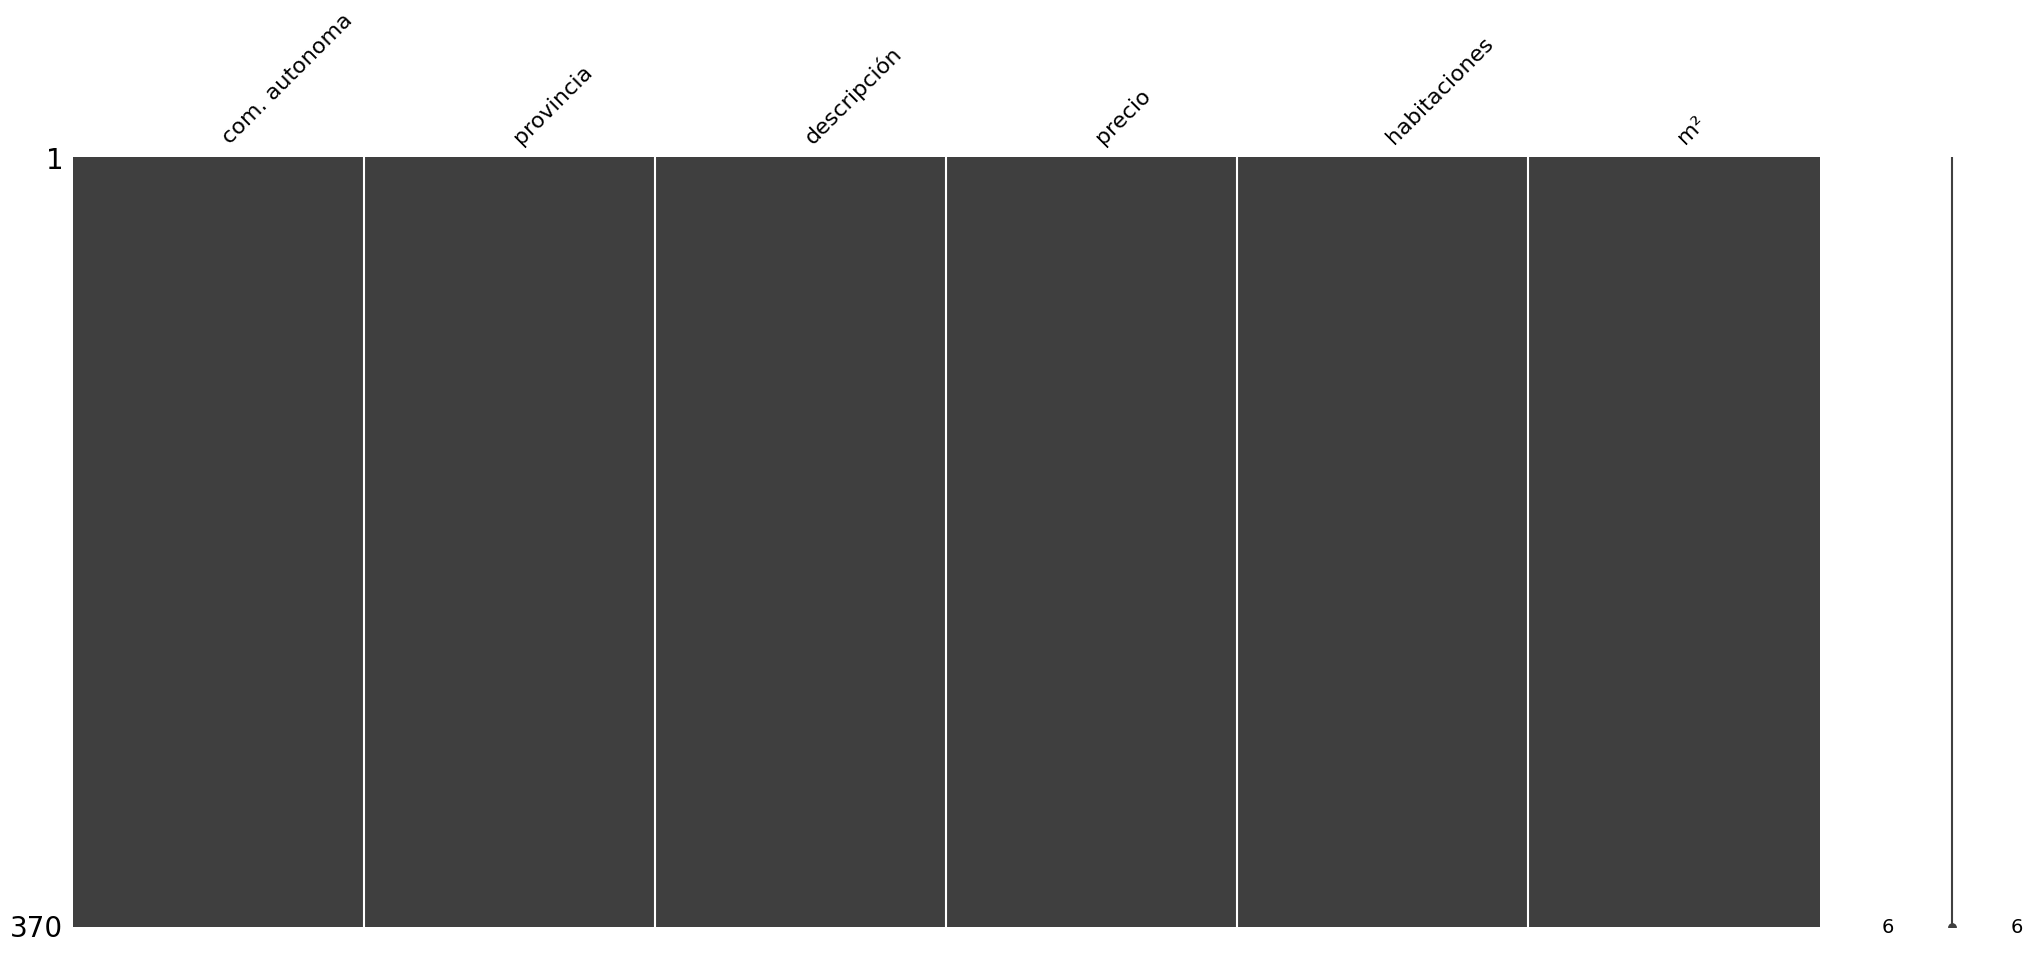

In [73]:
import missingno as msno

# Visualizar la matriz de valores faltantes
msno.matrix(dataframe)


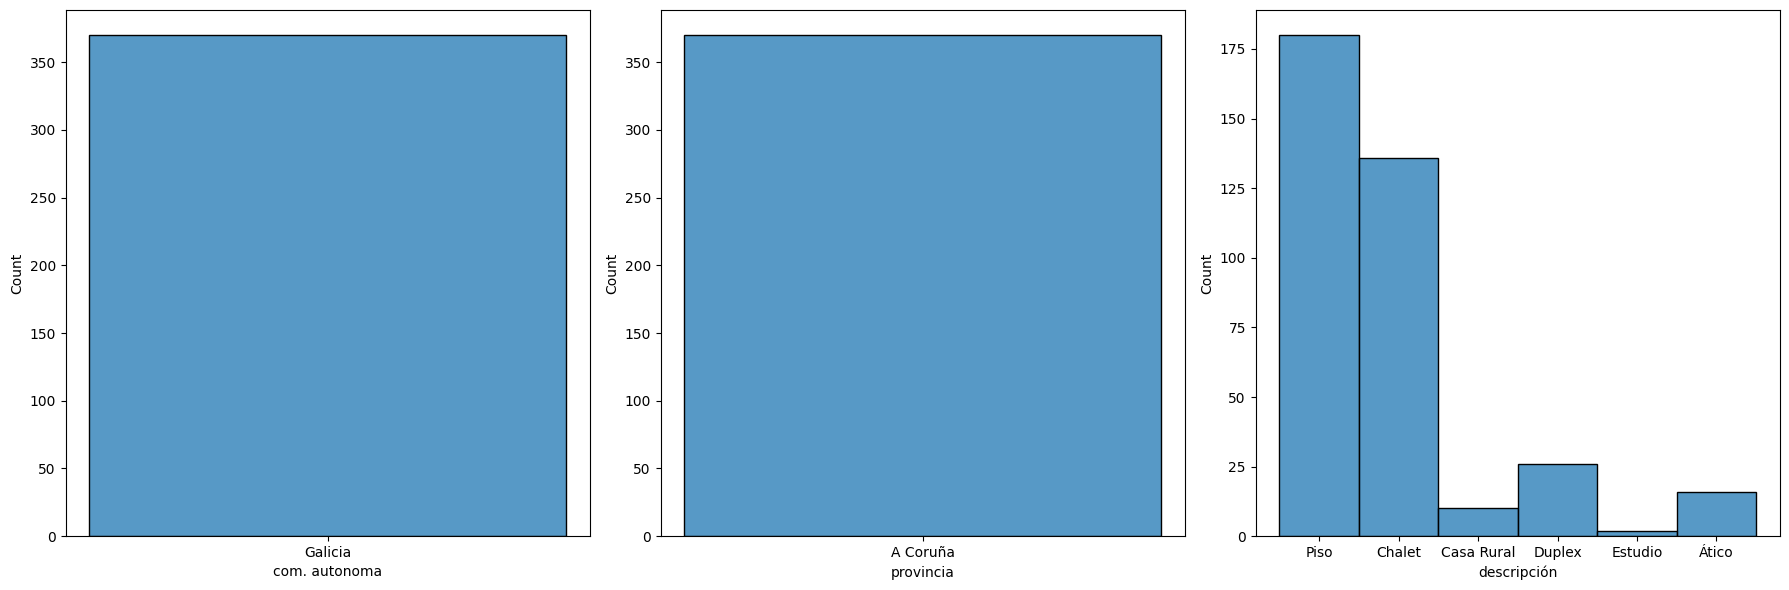

In [74]:
#Análisis sobre variables categóricas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Crear histograma
sns.histplot(ax=axes[0], data=dataframe, x='com. autonoma')
sns.histplot(ax=axes[1], data=dataframe, x='provincia')
sns.histplot(ax=axes[2], data=dataframe, x='descripción')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico    
plt.show()

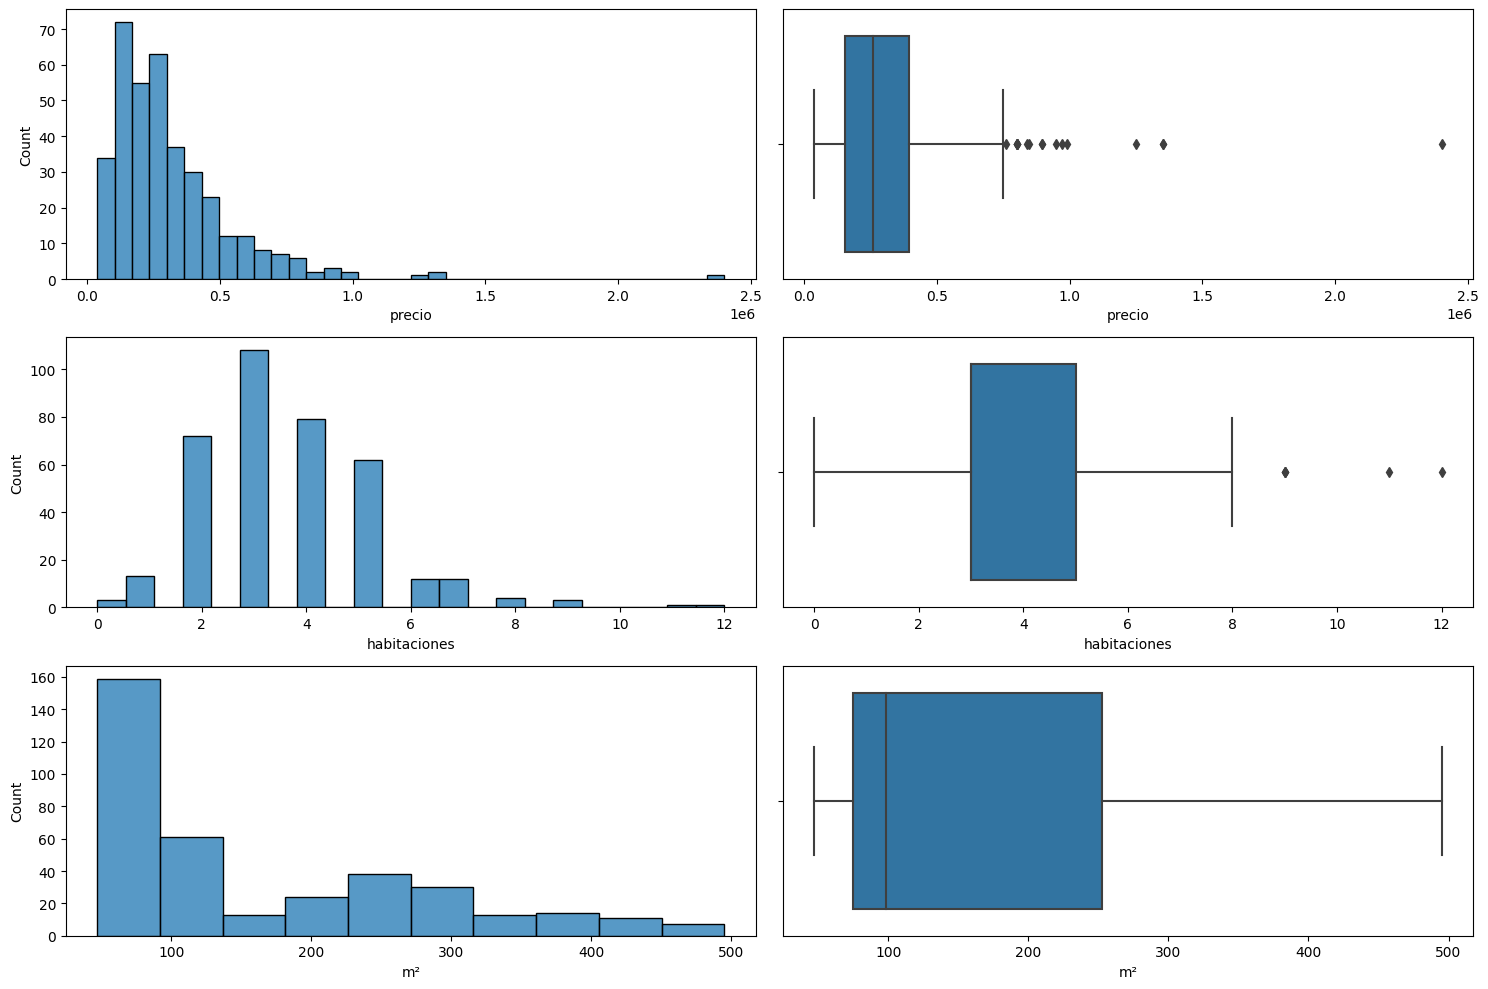

In [75]:
#Análisis sobre variables numericas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 10 filas y 2 columnas
fig, axis = plt.subplots(3, 2, figsize=(15, 10))

# Gráficos de las nuevas variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="precio")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="precio")
sns.histplot(ax=axis[1, 0], data=dataframe, x="habitaciones")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="habitaciones")
sns.histplot(ax=axis[2, 0], data=dataframe, x="m²")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="m²")

# Ajustar el layout        
plt.tight_layout()

# Mostrar el plot
plt.show()

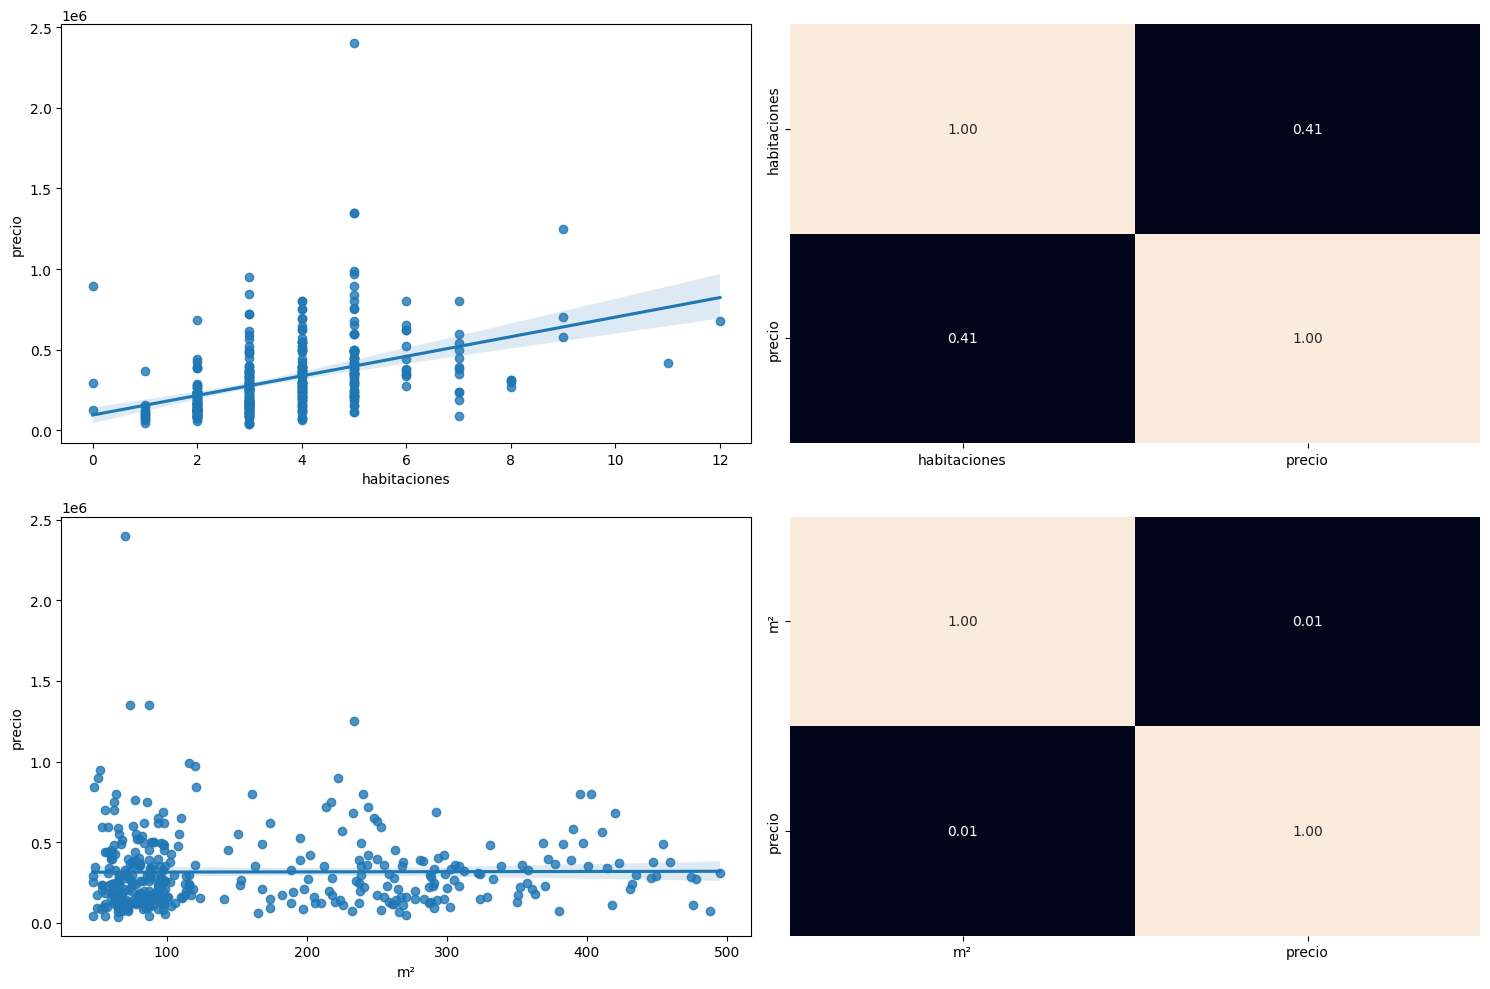

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

sns.regplot(ax=axis[0, 0], data=dataframe, x="habitaciones", y="precio")
sns.heatmap(dataframe[["habitaciones", "precio"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[1, 0].set_ylabel("precio")

sns.regplot(ax=axis[1, 0], data=dataframe, x="m²", y="precio")
sns.heatmap(dataframe[["m²", "precio"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


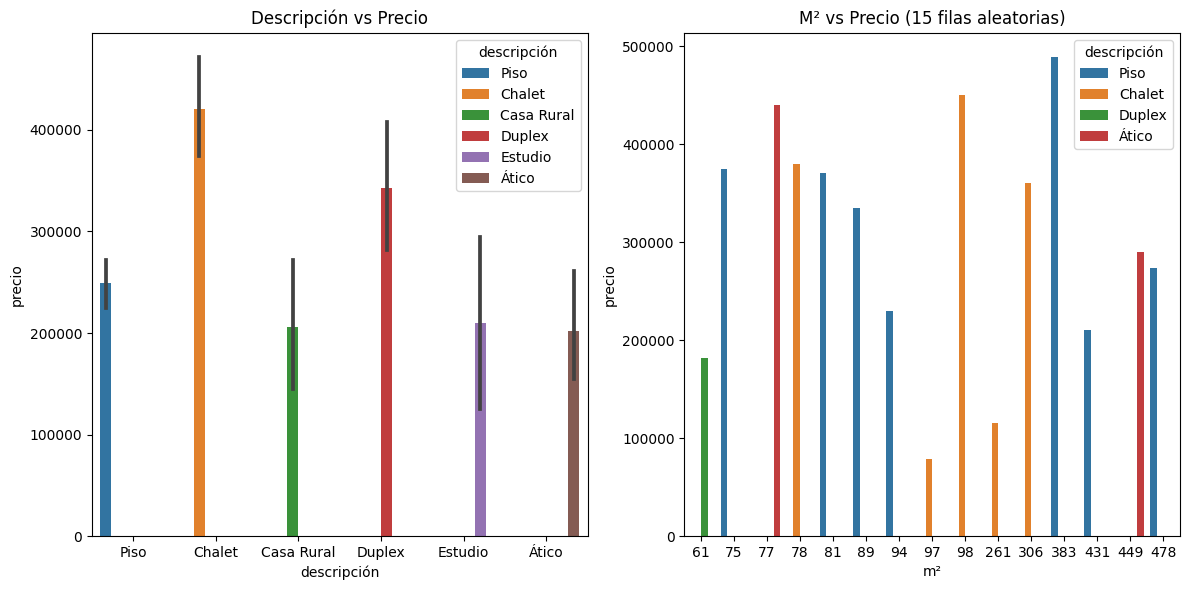

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Seleccionar 15 filas aleatorias del DataFrame
random_rows = dataframe.sample(15, random_state=42)

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(figsize=(12, 6), ncols=2)

# Gráfico de barras para 'descripción' vs 'precio'
sns.barplot(ax=axes[0], data=dataframe, x='descripción', y='precio', hue='descripción')
axes[0].set_title('Descripción vs Precio')

# Gráfico de barras para 30 filas aleatorias de 'm²' vs 'precio'
sns.barplot(ax=axes[1], data=random_rows, x='m²', y='precio', hue='descripción')
axes[1].set_title('M² vs Precio (15 filas aleatorias)')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [78]:
import pandas as pd

# Convertir las columnas categóricas a numéricas usando factorize
dataframe_copy = dataframe.copy()
categorical_columns = dataframe_copy.select_dtypes(include=['object']).columns

for column in categorical_columns:
    dataframe_copy[column] = pd.factorize(dataframe_copy[column])[0]

# Calcular la correlación entre todas las columnas
correlation_matrix = dataframe_copy.corr()

# Reemplazar los NaN en la matriz de correlación con ceros
correlation_matrix = correlation_matrix.fillna(0)

# Mostrar la matriz de correlación
print(correlation_matrix)


               com. autonoma  provincia  descripción  precio  habitaciones  \
com. autonoma           0.00       0.00         0.00    0.00          0.00   
provincia               0.00       0.00         0.00    0.00          0.00   
descripción             0.00       0.00         1.00    0.04         -0.00   
precio                  0.00       0.00         0.04    1.00          0.41   
habitaciones            0.00       0.00        -0.00    0.41          1.00   
m²                      0.00       0.00        -0.03    0.01          0.05   

                 m²  
com. autonoma  0.00  
provincia      0.00  
descripción   -0.03  
precio         0.01  
habitaciones   0.05  
m²             1.00  


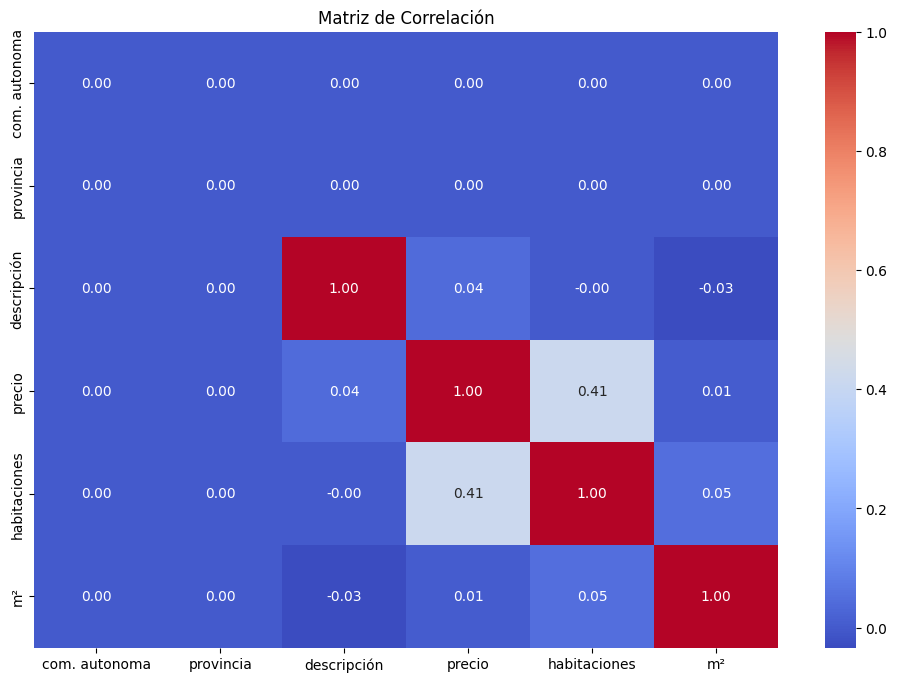

In [79]:
# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Añadir un título al gráfico
plt.title("Matriz de Correlación")

# Mostrar el mapa de calor
plt.show()

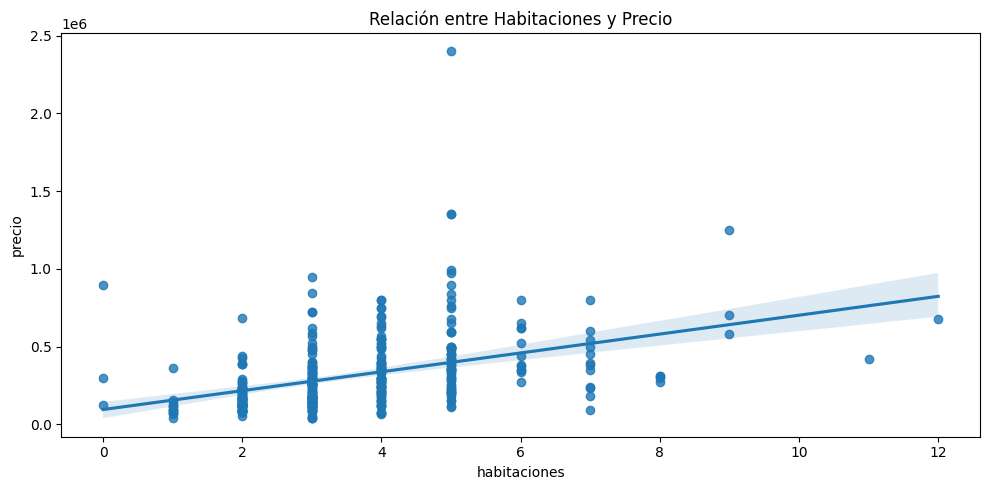

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con un solo subplot
fig, axis = plt.subplots(figsize=(10, 5))

# Graficar el scatter plot para "habitaciones" vs "precio"
sns.regplot(data=dataframe, x="habitaciones", y="precio")

# Añadir un título al gráfico
plt.title("Relación entre Habitaciones y Precio")

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


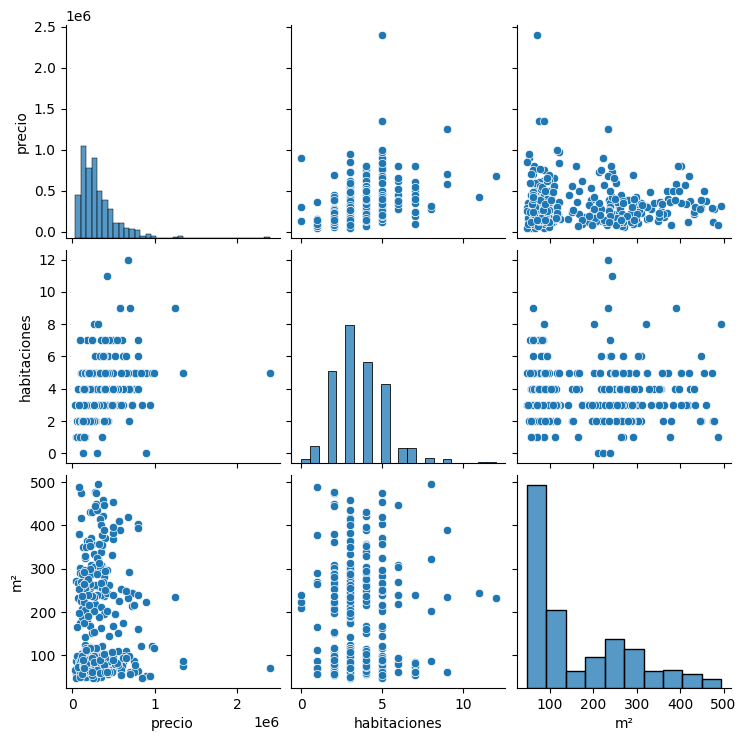

In [81]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


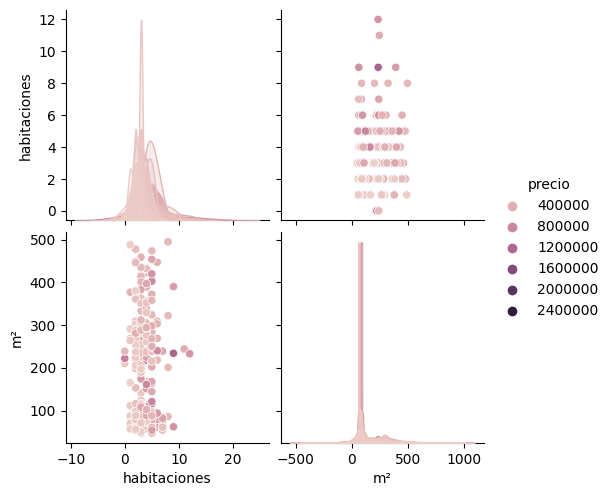

In [82]:
sns.pairplot(dataframe, hue='precio')

In [83]:
#análisis descriptivo

# Establecer el formato de punto flotante
pd.options.display.float_format = '{:.2f}'.format

# Realizar el análisis descriptivo
dataframe.describe()



,precio,habitaciones,m²
count,370.00,370.00,370.00
mean,315345.76,3.64,164.39
std,238618.14,1.63,116.19
min,38000.00,0.00,47.00
25%,155000.00,3.00,75.00
50%,259000.00,3.00,98.00
75%,393750.00,5.00,252.25
max,2400000.00,12.00,495.00


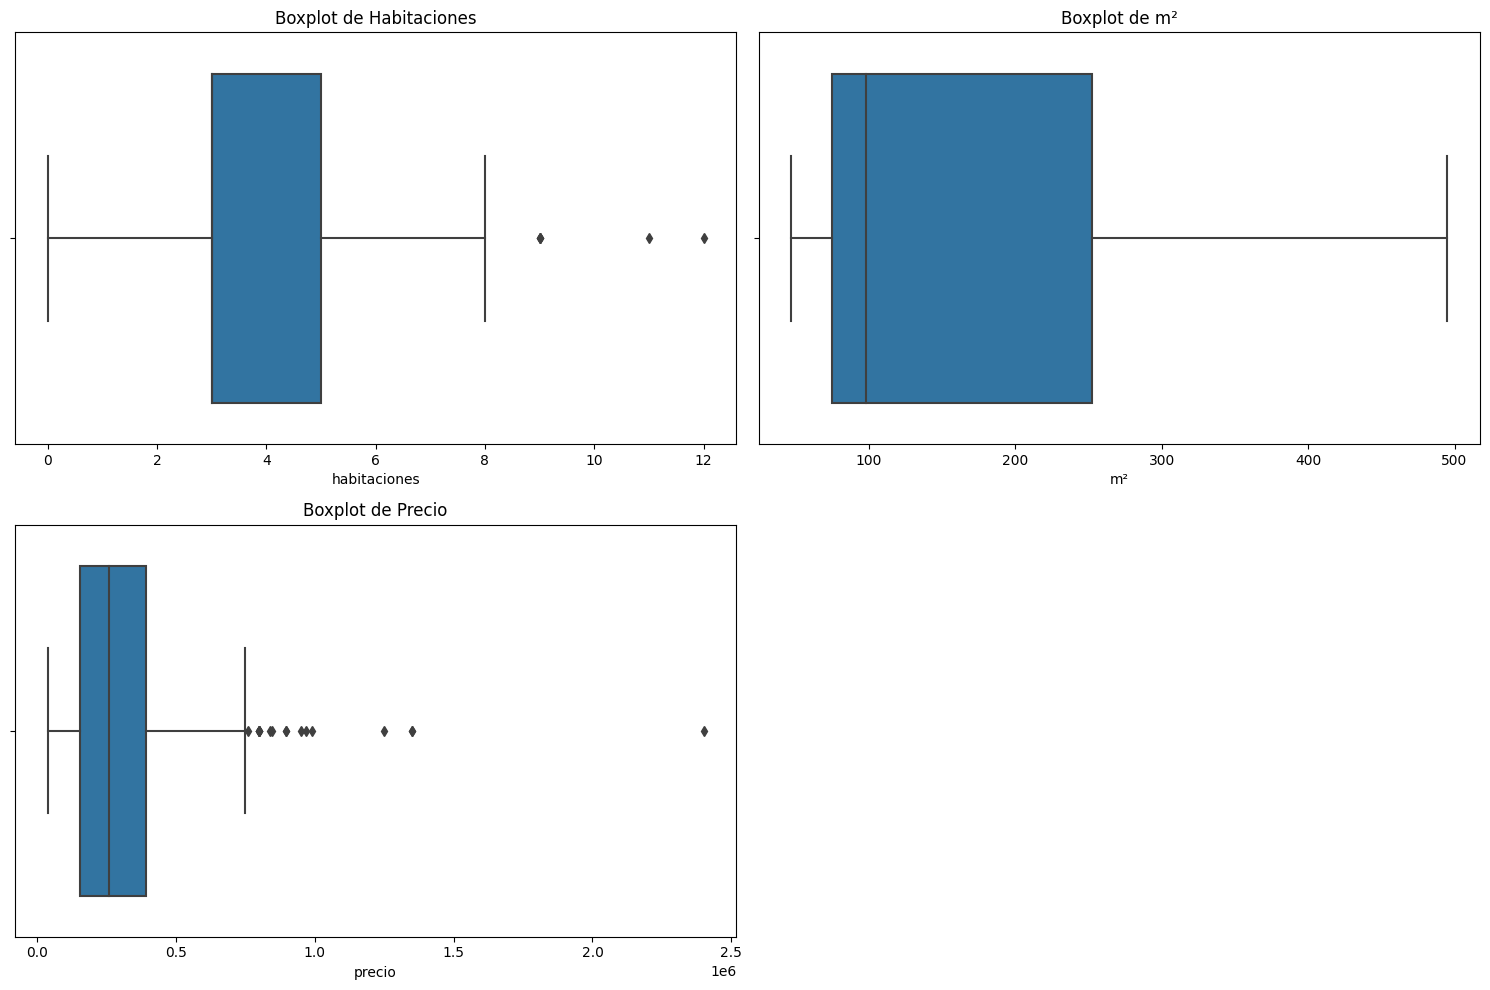

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot para 'habitaciones'
sns.boxplot(ax=axes[0, 0], data=dataframe, x='habitaciones')
axes[0, 0].set_title('Boxplot de Habitaciones')

# Boxplot para 'm²'
sns.boxplot(ax=axes[0, 1], data=dataframe, x='m²')
axes[0, 1].set_title('Boxplot de m²')

# Boxplot para 'precio'
sns.boxplot(ax=axes[1, 0], data=dataframe, x='precio')
axes[1, 0].set_title('Boxplot de Precio')

# Eliminar el cuadro de abajo a la derecha
fig.delaxes(axes[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [85]:
# Variables seleccionadas
selected_variables = ['habitaciones', 'm²', 'precio']

for variable in selected_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")


count   370.00
mean      3.64
std       1.63
min       0.00
25%       3.00
50%       3.00
75%       5.00
max      12.00
Name: habitaciones, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en habitaciones son 8.0 y 0.0, con un rango intercuartílico de 2.0

count   370.00
mean    164.39
std     116.19
min      47.00
25%      75.00
50%      98.00
75%     252.25
max     495.00
Name: m², dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en m² son 518.12 y -190.88, con un rango intercuartílico de 177.25

count       370.00
mean     315345.76
std      238618.14
min       38000.00
25%      155000.00
50%      259000.00
75%      393750.00
max     2400000.00
Name: precio, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en precio son 751875.0 y -203125.0, con un rango intercuartílico de 238750.0



In [86]:
#Análisis de valores faltantes

dataframe.isnull().sum()

com. autonoma    0
provincia        0
descripción      0
precio           0
habitaciones     0
m²               0
dtype: int64

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Variables seleccionadas
selected_variables = ['habitaciones', 'm²', 'precio']

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar las variables seleccionadas
scaled_features = scaler.fit_transform(dataframe[selected_variables])

# Crear un DataFrame con las variables escaladas
dataframe_scal = pd.DataFrame(scaled_features, index=dataframe.index, columns=selected_variables)

# Mostrar las primeras filas del DataFrame escalado
print(dataframe_scal.head())


   habitaciones   m²  precio
0          0.33 0.54    0.09
1          0.33 0.45    0.25
2          0.50 0.38    0.10
3          0.25 0.06    0.09
4          0.25 0.30    0.06


In [88]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = dataframe_scal.drop('precio', axis=1)
y = dataframe_scal['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear un modelo de selección de características
selection_model = SelectKBest(f_regression, k=2)  # Seleccionar las mejores 2 características

# Ajustar el modelo a los datos de entrenamiento
selection_model.fit(X_train, y_train)

# Obtener las columnas seleccionadas
selected_columns = X_train.columns[selection_model.get_support()]

# Transformar los conjuntos de entrenamiento y prueba utilizando las características seleccionadas
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

# Mostrar las primeras filas del conjunto de entrenamiento con características seleccionadas
print(X_train_sel.head())


   habitaciones   m²
0          0.25 0.01
1          0.42 0.04
2          0.25 0.00
3          0.17 0.04
4          0.17 0.08


In [89]:
X_test_sel.head()


,habitaciones,m²
0,0.25,0.75
1,0.33,0.86
2,0.42,0.11
3,0.42,0.07
4,0.25,0.11


In [90]:
X_train_sel["precio"] = y_train.values
X_test_sel["precio"] = y_test.values
X_train_sel.to_csv(r"/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/clean_train_A Coruña.csv", index=False)
X_test_sel.to_csv(r"/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/clean_test_A Coruña.csv", index=False)


---

regresion lineal

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Leer los datos
data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_train_A Coruña.csv')

# Seleccionar las columnas de interés
selected_columns = ['habitaciones', 'm²', 'precio']
data = data[selected_columns]

# Dividir los datos en características (X) y objetivo (y)
X = data.drop('precio', axis=1)
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error medio absoluto (MAE) y el coeficiente de determinación (R^2)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Error Medio Absoluto (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)


Error Medio Absoluto (MAE): 0.06250522472712723
Coeficiente de Determinación (R^2): 0.20291891661077255


decision tree

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Leer los datos
data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_train_A Coruña.csv')

# Seleccionar las columnas de interés
selected_columns = ['habitaciones', 'm²', 'precio']
data = data[selected_columns]

# Dividir los datos en características (X) y objetivo (y)
X = data.drop('precio', axis=1)
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular el Error Medio Absoluto (MAE) y el Coeficiente de Determinación (R^2)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Error Medio Absoluto (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)


Error Medio Absoluto (MAE): 0.08474312527720658
Coeficiente de Determinación (R^2): -0.5364683020049519


regresion lineal polinomica

Error Medio Absoluto (MAE): 0.0612311575651483
Coeficiente de Determinación (R^2): 0.21523731010997016


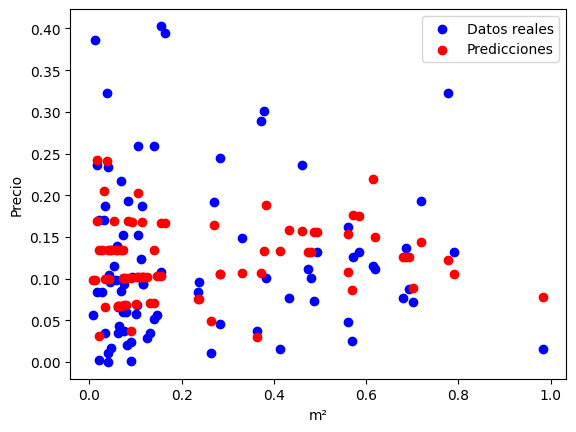

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Leer los datos
data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_train_A Coruña.csv')

# Seleccionar las columnas de interés
selected_columns = ['habitaciones', 'm²', 'precio']
data = data[selected_columns]

# Dividir los datos en características (X) y objetivo (y)
X = data.drop('precio', axis=1)
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar un modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_poly)

# Calcular el Error Medio Absoluto (MAE) y el Coeficiente de Determinación (R^2)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Error Medio Absoluto (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)

# Visualizar la regresión polinómica (solo para fines ilustrativos)
plt.scatter(X_test['m²'], y_test, label='Datos reales', color='blue')
plt.scatter(X_test['m²'], y_pred, label='Predicciones', color='red')
plt.xlabel('m²')
plt.ylabel('Precio')
plt.legend()
plt.show()


regresion polinomica + lasso

Resultados para Ridge:
Error Medio Absoluto (MAE): 0.06471286453814165
Coeficiente de Determinación (R^2): 0.1763186935265485

Resultados para Lasso:
Error Medio Absoluto (MAE): 0.07367355062967891
Coeficiente de Determinación (R^2): -0.0009957340664421555


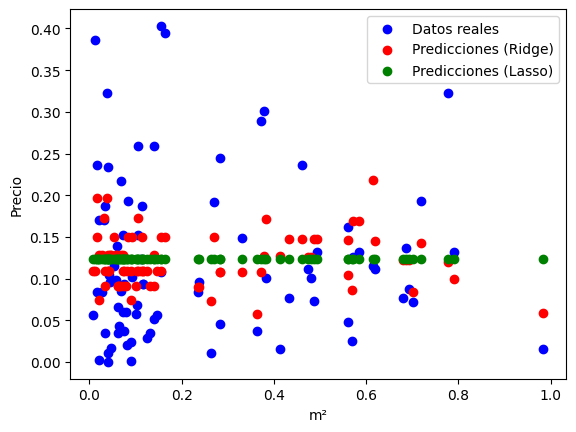

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Leer los datos
data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_train_A Coruña.csv')

# Seleccionar las columnas de interés
selected_columns = ['habitaciones', 'm²', 'precio']
data = data[selected_columns]

# Dividir los datos en características (X) y objetivo (y)
X = data.drop('precio', axis=1)
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar un modelo de regresión Ridge (regularización L2) con características polinómicas
ridge_model = Ridge(alpha=1.5)  # Puedes ajustar el valor de alpha según tus necesidades
ridge_model.fit(X_train_poly, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test_poly)

# Calcular el Error Medio Absoluto (MAE) y el Coeficiente de Determinación (R^2) para Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Crear y entrenar un modelo de regresión Lasso (regularización L1) con características polinómicas
lasso_model = Lasso(alpha=1.0)  # Puedes ajustar el valor de alpha según tus necesidades
lasso_model.fit(X_train_poly, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test_poly)

# Calcular el Error Medio Absoluto (MAE) y el Coeficiente de Determinación (R^2) para Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Imprimir los resultados para Ridge
print("Resultados para Ridge:")
print("Error Medio Absoluto (MAE):", mae_ridge)
print("Coeficiente de Determinación (R^2):", r2_ridge)

# Imprimir los resultados para Lasso
print("\nResultados para Lasso:")
print("Error Medio Absoluto (MAE):", mae_lasso)
print("Coeficiente de Determinación (R^2):", r2_lasso)

# Visualizar la regresión polinómica (solo para fines ilustrativos)
plt.scatter(X_test['m²'], y_test, label='Datos reales', color='blue')
plt.scatter(X_test['m²'], y_pred_ridge, label='Predicciones (Ridge)', color='red')
plt.scatter(X_test['m²'], y_pred_lasso, label='Predicciones (Lasso)', color='green')
plt.xlabel('m²')
plt.ylabel('Precio')
plt.legend()
plt.show()


Random Forest Regressor

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Leer los datos
data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_train_A Coruña.csv')

# Seleccionar las columnas de interés
selected_columns = ['habitaciones', 'm²', 'precio']
data = data[selected_columns]

# Dividir los datos en características (X) y objetivo (y)
X = data.drop('precio', axis=1)
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear y entrenar un modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el Error Medio Absoluto (MAE) y el Coeficiente de Determinación (R^2)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Error Medio Absoluto (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)


Error Medio Absoluto (MAE): 0.07413997577862644
Coeficiente de Determinación (R^2): -0.1745498995759902


Gradient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Crear y entrenar el modelo Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Medio Absoluto (MAE) y el Coeficiente de Determinación (R^2)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Error Medio Absoluto (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)


Error Medio Absoluto (MAE): 0.06721258114791293
Coeficiente de Determinación (R^2): -0.1084303286305568


LightGBM

In [105]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Leer los datos
data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_train_A Coruña.csv')

# Seleccionar las columnas de interés
selected_columns = ['precio', 'habitaciones', 'm²']
data = data[selected_columns]

# Dividir los datos en características (X) y objetivo (y)
X = data.drop('precio', axis=1)
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear y entrenar un modelo LightGBM
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 100,
    'subsample_for_bin': 200,
    'min_child_samples': 20,
    'colsample_bytree': 0.5,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'min_split_gain': 0.01,
    'min_child_weight': 0.1,
    'verbose': -1
}

# Crear y entrenar el modelo
model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Medio Absoluto (MAE) y el Coeficiente de Determinación (R^2)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Error Medio Absoluto (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)



Error Medio Absoluto (MAE): 0.06404106633130262
Coeficiente de Determinación (R^2): 0.17779474167828846


In [106]:
# Parámetros de LightGBM
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'num_leaves': 10,               # Reducir aún más para simplificar el modelo
    'learning_rate': 0.05,         # Reducir ligeramente la tasa de aprendizaje
    'n_estimators': 500,           # Aumentar el número de árboles
    'subsample_for_bin': 200,
    'min_child_samples': 5,        # Reducir para controlar el sobreajuste
    'colsample_bytree': 0.6,       # Ligeramente menor para mayor regularización
    'reg_alpha': 0.1,              # Regularización L1
    'reg_lambda': 0.05,            # Regularización L2
    'min_split_gain': 0.001,       # Puedes experimentar con esto
    'min_child_weight': 0.001,     # Puedes experimentar con esto
    'verbose': -1
}



# Imprimir los resultados
print("Error Medio Absoluto (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)

Error Medio Absoluto (MAE): 0.06404106633130262
Coeficiente de Determinación (R^2): 0.17779474167828846
